# Machine learning

We focus on a one-feature regression problem in order to clearly visualize the model behavior and validation results.

We fit an SVR model to the training data and predict house prices over some variable (`variableA`).  

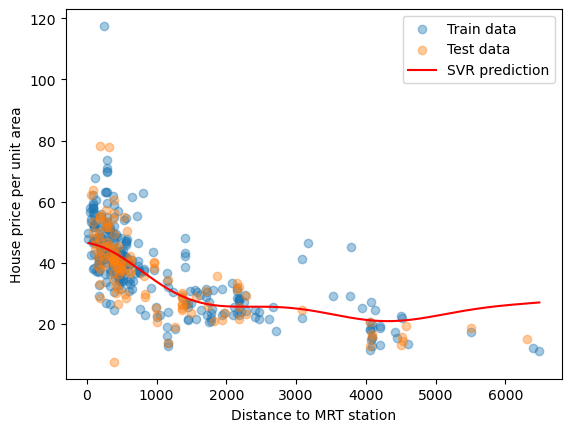

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error

df = pd.read_csv("Real estate valuation data set.csv")

X1 = df[["X3 distance to the nearest MRT station"]].values
y = df["Y house price of unit area"].values

plt.xlabel("Distance to MRT station")
plt.ylabel("House price per unit area")

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

svr = SVR(kernel="rbf")
svr.fit(X1_train, y_train)

x1_plot = np.linspace(X1.min(), X1.max(), 300).reshape(-1, 1)
y_plot = svr.predict(x1_plot)

plt.scatter(X1_train, y_train, alpha=0.4, label="Train data")
plt.scatter(X1_test, y_test, alpha=0.4, label="Test data")
plt.plot(x1_plot, y_plot, color="red", label="SVR prediction")
plt.legend()
plt.show()

Validation below.

In [2]:
y_pred_train = svr.predict(X1_train)
y_pred_test  = svr.predict(X1_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test,  y_pred_test)

print(f"MSE (training) = {mse_train}")
print(f"MSE (test)     = {mse_test}")

MSE (training) = 90.41470463113576
MSE (test)     = 76.48848736033109


<br>
This indicates that variable A has relatively stronger explanatory power for house prices, even when used alone.
The fact that the test MSE is slightly smaller than the training MSE is likely due to random data splitting and the regularization effect of SVR, rather than overfitting.
<br>

___


We fit an SVR model to the training data and predict house prices over other variable (`variableB`).  

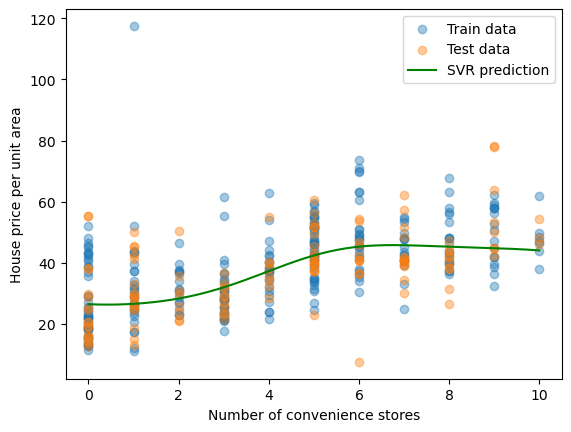

In [3]:
X2 = df[["X4 number of convenience stores"]].values

plt.xlabel("Number of convenience stores")
plt.ylabel("House price per unit area")

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=0)

svr = SVR(kernel="rbf")
svr.fit(X2_train, y_train)

x2_plot = np.linspace(X2.min(), X2.max(), 300).reshape(-1, 1)
y_plot = svr.predict(x2_plot)

plt.scatter(X2_train, y_train, alpha=0.4, label="Train data")
plt.scatter(X2_test, y_test, alpha=0.4, label="Test data")
plt.plot(x2_plot, y_plot, color="green", label="SVR prediction")
plt.legend()
plt.show()

Validation below.

In [4]:
y_pred_train = svr.predict(X2_train)
y_pred_test  = svr.predict(X2_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test,  y_pred_test)

print(f"MSE (training) = {mse_train}")
print(f"MSE (test)     = {mse_test}")

MSE (training) = 126.89333897559806
MSE (test)     = 114.54356630326743


<br>

___


We fit an SVR model to the training data and predict house prices over other variable (`variableC`). 

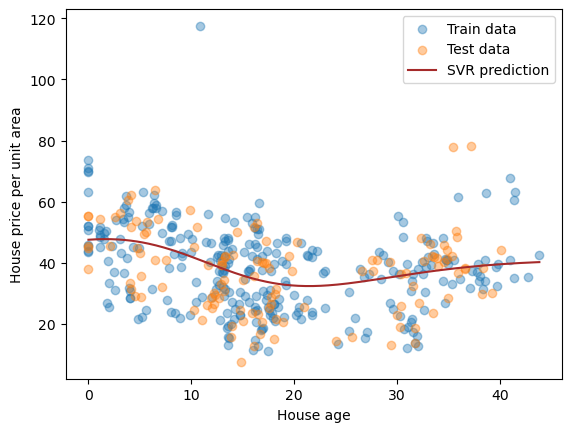

In [5]:
X3 = df[["X2 house age"]].values

plt.xlabel("House age")
plt.ylabel("House price per unit area")

X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=0)

svr = SVR(kernel="rbf")
svr.fit(X3_train, y_train)

x3_plot = np.linspace(X3.min(), X3.max(), 300).reshape(-1, 1)
y_plot = svr.predict(x3_plot)

plt.scatter(X3_train, y_train, alpha=0.4, label="Train data")
plt.scatter(X3_test, y_test, alpha=0.4, label="Test data")
plt.plot(x3_plot, y_plot, color="brown", label="SVR prediction")
plt.legend()
plt.show()

Validation below.

In [6]:
y_pred_train = svr.predict(X3_train)
y_pred_test  = svr.predict(X3_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test,  y_pred_test)

print(f"MSE (training) = {mse_train}")
print(f"MSE (test)     = {mse_test}")

MSE (training) = 156.20511457797133
MSE (test)     = 139.73384112421442


Comparing the three single-variable models, `variableA` shows the lowest MSE on both training and test data, indicating the strongest explanatory power for house prices.
`VariableB` results in higher MSE, suggesting a weaker relationship with the target variable.
`VariableC` produces the highest MSE, indicating that it provides the least information when used alone.